In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/research/Data/

/content/drive/My Drive/research/Data


In [ ]:
df = pd.read_csv('df_translated.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1739 entries, 0 to 1738
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_title   1739 non-null   object
 1   text          1739 non-null   object
 2   Label         1739 non-null   object
 3   Domain        1739 non-null   object
 4   About         764 non-null    object
 5   english_text  1739 non-null   object
dtypes: object(6)
memory usage: 81.6+ KB


In [ ]:
df.Domain.value_counts()

,count
Domain,
Non political,969
Political,770


In [ ]:
df.loc[df['Domain'] == 'Ranil', 'About'] = 'Ranil'
df.loc[df['Domain'] == 'Government', 'About'] = 'Government'

In [ ]:
df.About.value_counts()

,count
About,
Ranil,398
Everyone,123
Rajapaksha,120
Other,45
NPP,31
Sajith,27
UNP,20


In [ ]:
df['Domain'] = df['Domain'].replace('P','Political')
df['Domain'] = df['Domain'].replace('Government','Political')
df['Domain'] = df['Domain'].replace('political','Political')
df['Domain'] = df['Domain'].replace('Ranil','Political')
df['Domain'] = df['Domain'].fillna('Non political')
df['Domain'] = df['Domain'].replace('Non','Non political')

In [ ]:
df['About'] = df['About'].replace(['Mahinda', 'mahinda'], 'Rajapaksha')
df['About'] = df['About'].replace(['Government', 'government'], '225')
df['About'] = df['About'].replace(['Anura','JVP'], 'NPP')
df['About'] = df['About'].replace(['everyone', 'Everone','Everyone','all'], '225')

In [ ]:
#df = df.head(1000)
df.shape

(1739, 6)

In [ ]:
political_df = df[df['Domain'] == 'Political']
non_political_df = df[df['Domain'] == 'Non political']

# Sample 300 entries from each category
sampled_political = political_df.sample(n=770, random_state=42)
sampled_non_political = non_political_df.sample(n=770, random_state=42)

# Combine the sampled entries into a single DataFrame
df = pd.concat([sampled_political, sampled_non_political])


In [ ]:
df.shape

(1540, 6)

# Combine Title and Text columns

In [ ]:
df['Combined'] = df['video_title'] + '.' + df['text']

# Remove Emoticons

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
df['Combined'] = df['Combined'].apply(remove_emoji)

# Remove URLs

In [ ]:
def remove_urls(text):
  return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)

# Apply the function to the text column
df['Combined'] = df['Combined'].apply(remove_urls)

# Data Cleaning

In [ ]:
def clean_data(text):

    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text) # Remove URLs

    text = re.sub(r'<.*?>', '', text)     # Remove HTML tags

    text = re.sub(r'@\\w+', '', text)  # Remove mentions

    text = re.sub(r'[^\u0D80-\u0DFF\s]', ' ', text) # Remove non-Sinhala characters (punctuation, numbers, etc.)
    return text

df['Combined'] = df['Combined'].apply(clean_data)

In [ ]:
df.iloc[50:75]

,video_title,text,Label,Domain,About,english_text,Combined
1520,Wada Pitiya - 2017.01.03,2030 වෙනකම් ඉන්නවා කියන එක වසපාලනයේ සිහිනයක්. ...,Negative,Political,Other,A dream of the passage that standing until 203...,වෙනකම් ඉන්නවා කි...
1191,අගමැතිගෙන් විශේෂ ප්‍රකාශයක්...,ගිනිතිබ්බ එක අනුමත කරන්නත් බෑ ඒ වගේම ඔබතුමාගේ ...,Negative,Political,Ranil,You can't approve of the burning and that you ...,අගමැතිගෙන් විශේෂ ප් රකාශයක් ගිනිතිබ්බ එක අන...
1494,Wada Pitiya - 2017.05.03,යකෝ හරින් තොපිලා කරපු දේවල් පොතක් ලියන්න ම...,Negative,Political,Other,What Harin's stuff was to write a book on Hari...,යකෝ හරින් තොපිලා ක...
1447,"Wada Pitiya | IMF ණය සහනයට මාවත විවෘත වෙද්දී, ...",මාලිමාවට ජයවේවා🇧🇭,Positive,Political,NPP,May win the compass,ණය සහනයට මාවත විවෘත වෙද්දී ...
1353,අගමැතිගෙන් විශේෂ ප්‍රකාශයක්...,ගොන් පකයා පල යන්න<br>තෝ ආවා කියලා එක ප්‍රශ්නයක...,Negative,Political,Ranil,Did the bullfall go fruitfully? - Nakaki humps,අගමැතිගෙන් විශේෂ ප් රකාශයක් ගොන් පකයා පල යන...
917,"""ඉන්දියාව ලංකාවට ඇවිල්ලා වගේ""",හැම.කනු ගොඩ.ම.ඵන්නේ.ලංකාවට.මොකද.දේසපාලුවෝ.කන්න...,Negative,Political,225,All Througs.,ඉන්දියාව ලංකාවට ඇවිල්ලා වගේ හැම කනු ගොඩ ම ඵන...
1133,අගමැතිගෙන් විශේෂ ප්‍රකාශයක්...,අනේ පලයන් පරයො යන්න. උබ අගමැති වෙලා මුලු රටම ර...,Negative,Political,Ranil,Please go out of the plight.The whole country ...,අගමැතිගෙන් විශේෂ ප් රකාශයක් අනේ පලයන් පරයො ...
1238,අගමැතිගෙන් විශේෂ ප්‍රකාශයක්...,උබ අගමැතිකම බාර ගත්තෙ ජනතාවට තියෙන ආදරේට නෙමේ ...,Negative,Political,Ranil,"You accepted the Prime Minister, not for the l...",අගමැතිගෙන් විශේෂ ප් රකාශයක් උබ අගමැතිකම බාර...
1613,ජනාධිපතිවරණය 2019 : ගාල්ල දිස්ත්‍රික්කය - තැපැ...,ගාල්ල දින්න කියල පාන්ද? සජිත් ප්‍රේමදාස දැන් එ...,Positive,Political,Sajith,"Bowed down to Galle?Carrie Katie Slavery Lore,...",ජනාධිපතිවරණය ගාල්ල දිස්ත් රික්කය තැපැ...
1202,අගමැතිගෙන් විශේෂ ප්‍රකාශයක්...,අනේ බුදු මහත්තයෝ ඔය දෙසියවිසි පහ ම තමයි ඔිවා ක...,Negative,Political,Ranil,But the Buddha didn't want to do anything abou...,අගමැතිගෙන් විශේෂ ප් රකාශයක් අනේ බුදු මහත්තය...


In [ ]:
columns = ['Combined','Label','Domain','About']

df = df[columns]

In [ ]:
df.iloc[12:20]

,Combined,Label,Domain,About
784,අභිමානවත් සැමරුම මැද කාගේත් හදවත් සංවේදී කළ ...,Negative,Political,Ranil
980,අගමැතිගෙන් විශේෂ ප් රකාශයක් යකූ අරගලයේ හිටප...,Negative,Political,Ranil
1671,ජනාධිපතිවරණය මොනරාගල දිස්ත් රික්කය තැ...,Positive,Political,Rajapaksha
990,අගමැතිගෙන් විශේෂ ප් රකාශයක් රනිල් යන්ඩ යන්...,Negative,Political,Ranil
1536,තිරය පිටුපස රංජන්ගේ ජිවිතයට ගොටා...,Negative,Political,Rajapaksha
1711,ජනාධිපතිවරණය ගාල්ල දිස්ත් රික්කය අක්ම...,Positive,Political,Rajapaksha
1267,අගමැතිගෙන් විශේෂ ප් රකාශයක් ඔයාමයි නේද ගිනි...,Negative,Political,Ranil
1115,අගමැතිගෙන් විශේෂ ප් රකාශයක් පොත් පත් ගැන ගො...,Negative,Political,Rajapaksha


In [ ]:
df.Domain.value_counts()

,count
Domain,
Political,770
Non political,770


In [ ]:
df = df.sample(frac=1.0, random_state=42)

In [ ]:
labels = df['Domain'].unique().tolist()
labels = [str(s).strip() for s in labels ]
labels
labels[0], labels[1] = labels[1], labels[0]
labels

['Non political', 'Political']

In [ ]:

NUM_LABELS= len(labels)

id2label={id:label for id,label in enumerate(labels)}

label2id={label:id for id,label in enumerate(labels)}

In [ ]:
df.head()

,Combined,Label,Domain,About
1357,අගමැතිගෙන් විශේෂ ප් රකාශයක් මේ ප යාට පුක දෙ...,Negative,Political,Ranil
578,ශ් රී ලංකාව ගැන නාසා ආයතනයෙන් ආන්දෝලනාත්මක හ...,Neutral,Non political,NaN
486,ශ් රී ලංකාවේ දකුණු කෙළවරේ වෙනස අපිට මේකෙන්...,Negative,Political,225
590,ශ් රී ලංකාව ගැන නාසා ආයතනයෙන් ආන්දෝලනාත්මක හ...,Negative,Political,NPP
125,සරම්ප මර්දන එන්නත්කරණ වැඩසටහන ඇරඹෙයි ප් ර...,Negative,Non political,NaN


In [ ]:
label2id

{'Non political': 0, 'Political': 1}

In [ ]:
df.Domain.value_counts()

,count
Domain,
Political,770
Non political,770


In [ ]:
id2label

{0: 'Non political', 1: 'Political'}

In [ ]:
for key, value in enumerate(labels):
    print(value)

Non political
Political


In [ ]:
df["Domain"]=df.Domain.map(lambda x: label2id[x.strip()])

<Axes: ylabel='count'>

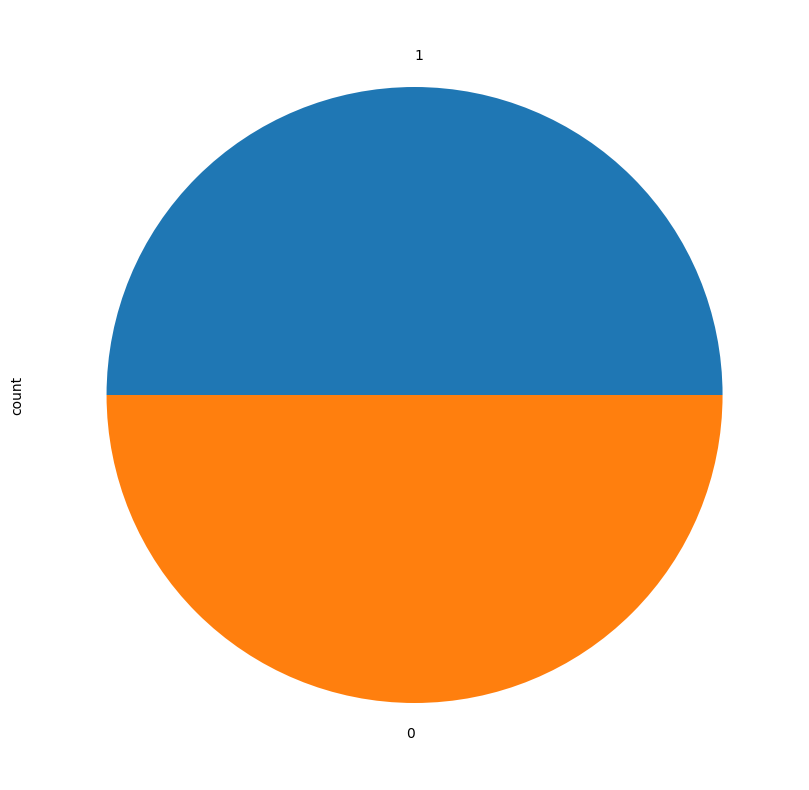

In [ ]:
df.Domain.value_counts().plot(kind='pie', figsize=(10,10))

In [ ]:
df.head()

,Combined,Label,Domain,About
1357,අගමැතිගෙන් විශේෂ ප් රකාශයක් මේ ප යාට පුක දෙ...,Negative,1,Ranil
578,ශ් රී ලංකාව ගැන නාසා ආයතනයෙන් ආන්දෝලනාත්මක හ...,Neutral,0,NaN
486,ශ් රී ලංකාවේ දකුණු කෙළවරේ වෙනස අපිට මේකෙන්...,Negative,1,225
590,ශ් රී ලංකාව ගැන නාසා ආයතනයෙන් ආන්දෝලනාත්මක හ...,Negative,1,NPP
125,සරම්ප මර්දන එන්නත්කරණ වැඩසටහන ඇරඹෙයි ප් ර...,Negative,0,NaN


In [ ]:

data_texts = df['Combined'].to_list()

data_labels = df['Domain'].to_list()

In [ ]:
label_set = set(data_labels)

In [ ]:
label_set

{0, 1}

In [ ]:
df.head()

,Combined,Label,Domain,About
1357,අගමැතිගෙන් විශේෂ ප් රකාශයක් මේ ප යාට පුක දෙ...,Negative,1,Ranil
578,ශ් රී ලංකාව ගැන නාසා ආයතනයෙන් ආන්දෝලනාත්මක හ...,Neutral,0,NaN
486,ශ් රී ලංකාවේ දකුණු කෙළවරේ වෙනස අපිට මේකෙන්...,Negative,1,225
590,ශ් රී ලංකාව ගැන නාසා ආයතනයෙන් ආන්දෝලනාත්මක හ...,Negative,1,NPP
125,සරම්ප මර්දන එන්නත්කරණ වැඩසටහන ඇරඹෙයි ප් ර...,Negative,0,NaN


In [ ]:
import numpy as np
contents = [content for content in df.Combined]

max_content_len = 0

content_len = []
for content in contents:
    content_len.append(len(content.split()))
    max_content_len = max(len(content.split()), max_content_len)

print('Number of contents:', len(contents))
print('Max length of the contents:', max_content_len)
print('Mean length of the contents:', np.mean(content_len))

Number of contents: 1540
Max length of the contents: 257
Mean length of the contents: 23.074675324675326


# Model and Training

In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained('NLPC-UOM/SinBERT-small', num_labels=NUM_LABELS)  #  binary classi

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at NLPC-UOM/SinBERT-small and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.config

RobertaConfig {
  "_name_or_path": "NLPC-UOM/SinBERT-small",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 6,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.42.4",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 30000
}

# Train, Test, Validation Split

In [ ]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM
tokenizer = AutoTokenizer.from_pretrained("NLPC-UOM/SinBERT-small",force_download = True)

# train_encodings = tokenizer(train_texts,max_length = 512, truncation = True, padding = "max_length"  )

# val_encodings = tokenizer(val_texts, max_length = 512,truncation = True, padding = "max_length" )

# test_encodings = tokenizer(test_texts, max_length = 512,truncation = True, padding = "max_length" )


config.json:   0%|          | 0.00/635 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/839k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/639k [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset

In [ ]:
class FakeNewsDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=208):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data.iloc[idx]['Combined']
        label = torch.tensor(self.data.iloc[idx]['Domain'], dtype=torch.long)

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_length,
            padding='max_length',
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'label': label}


# model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Create datasets and data loaders
train_dataset = FakeNewsDataset(train_df, tokenizer)
val_dataset = FakeNewsDataset(val_df, tokenizer)
test_dataset = FakeNewsDataset(test_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Set up optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=5e-6)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
NUM_EPOCHS = 10
train_losses = []
val_losses = []
val_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(NUM_EPOCHS):
    # Training
    model.train()
    train_loss = 0.0
    all_preds = []
    all_labels = []

    loop = tqdm(train_loader)
    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.logits, 1)

        all_preds.extend(preds.cpu().tolist())
        all_labels.extend(labels.cpu().tolist())

        train_loss += loss.item()

        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(loss=train_loss / len(loop), acc=accuracy_score(all_preds, all_labels))

    # Validation
    model.eval()
    val_loss = 0.0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for batch in tqdm(val_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            _, preds = torch.max(outputs.logits, 1)

            val_preds.extend(preds.cpu().tolist())
            val_labels.extend(labels.cpu().tolist())

            val_loss += loss.item()

# training
    model.eval()
    test_loss = 0.0
    all_test_preds = []
    all_test_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            _, test_preds = torch.max(outputs.logits, 1)

            all_test_preds.extend(test_preds.tolist())
            all_test_labels.extend(labels.tolist())

            test_loss += loss.item()

    test_accuracy = accuracy_score(all_test_labels, all_test_preds)
    test_accuracies.append(test_accuracy)

    train_acc = accuracy_score(all_preds, all_labels)
    val_acc = accuracy_score(val_preds, val_labels)

    train_losses.append(train_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_acc)
    train_accuracies.append(train_acc)

    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}] - Training Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")

100%|██████████| 5/5 [00:01<00:00,  2.94it/s]


Epoch [1/10] - Training Accuracy: 0.6218, Validation Accuracy: 0.7338


100%|██████████| 5/5 [00:01<00:00,  3.80it/s]


Epoch [2/10] - Training Accuracy: 0.7159, Validation Accuracy: 0.7273


100%|██████████| 5/5 [00:01<00:00,  2.91it/s]


Epoch [3/10] - Training Accuracy: 0.7492, Validation Accuracy: 0.7143


100%|██████████| 5/5 [00:01<00:00,  3.19it/s]


Epoch [4/10] - Training Accuracy: 0.7849, Validation Accuracy: 0.7597


100%|██████████| 5/5 [00:01<00:00,  2.73it/s]


Epoch [5/10] - Training Accuracy: 0.7995, Validation Accuracy: 0.7987


100%|██████████| 5/5 [00:01<00:00,  3.57it/s]


Epoch [6/10] - Training Accuracy: 0.8312, Validation Accuracy: 0.8247


100%|██████████| 5/5 [00:01<00:00,  2.74it/s]


Epoch [7/10] - Training Accuracy: 0.8336, Validation Accuracy: 0.8312


100%|██████████| 5/5 [00:01<00:00,  2.78it/s]


Epoch [8/10] - Training Accuracy: 0.8555, Validation Accuracy: 0.8442


100%|██████████| 5/5 [00:01<00:00,  3.38it/s]


Epoch [9/10] - Training Accuracy: 0.8644, Validation Accuracy: 0.8506


100%|██████████| 5/5 [00:01<00:00,  2.61it/s]


Epoch [10/10] - Training Accuracy: 0.8831, Validation Accuracy: 0.8442


In [ ]:
torch.save(model,'model_2.pth')

# Training Accuracy and Validation Accuracy

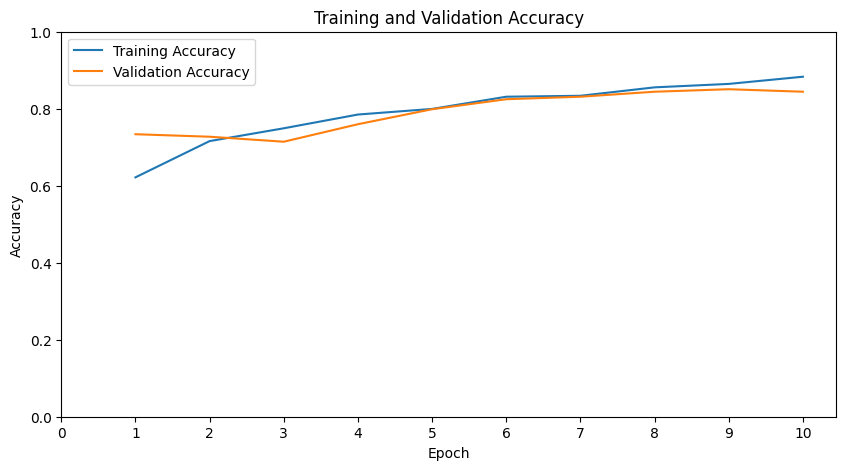

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, NUM_EPOCHS + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, NUM_EPOCHS + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(range(NUM_EPOCHS + 1))
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Training and Validation Loss

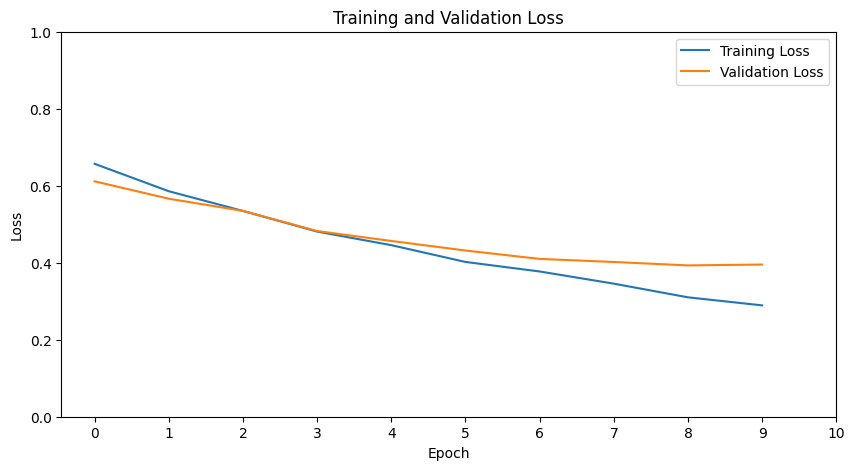

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(NUM_EPOCHS + 1))
plt.title('Training and Validation Loss')
plt.ylim(0,1)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(all_test_labels, all_test_preds)
class_report = classification_report(all_test_labels, all_test_preds,target_names = ['Political','Non Political'])
print(class_report)

               precision    recall  f1-score   support

    Political       0.84      0.75      0.79        68
Non Political       0.82      0.88      0.85        86

     accuracy                           0.82       154
    macro avg       0.83      0.82      0.82       154
 weighted avg       0.83      0.82      0.82       154



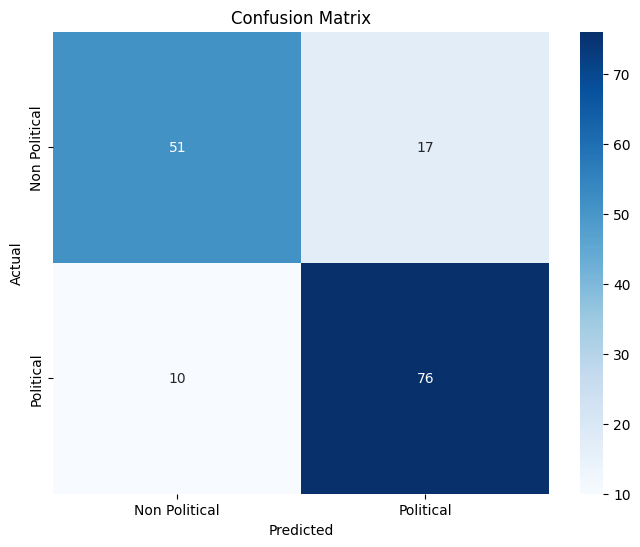

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(all_test_labels, all_test_preds)

plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Political','Political'], yticklabels=['Non Political','Political'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Test Accuracy

In [ ]:
model_checkpoint = "model_2.pth"
model = torch.load(model_checkpoint)
model = model.to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

test_train_accuracies = []

def calculate_accuracy(data_loader, test_model):
    test_model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = test_model(input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, 1)
            all_preds.extend(preds.tolist())
            all_labels.extend(labels.tolist())

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

test_accuracy = calculate_accuracy(test_loader, model)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8247


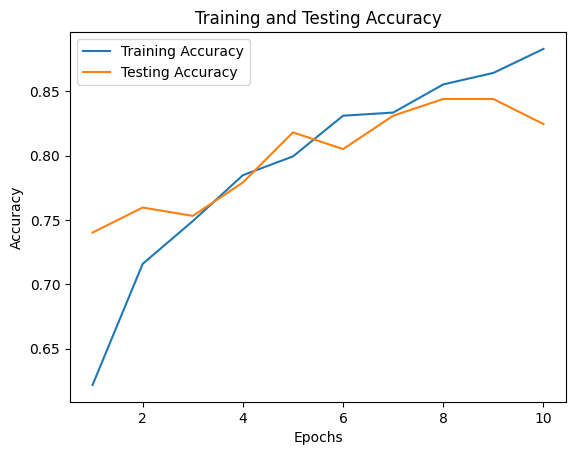

In [ ]:
epochs = range(1, NUM_EPOCHS + 1)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, test_accuracies, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()